## Overall Clarity

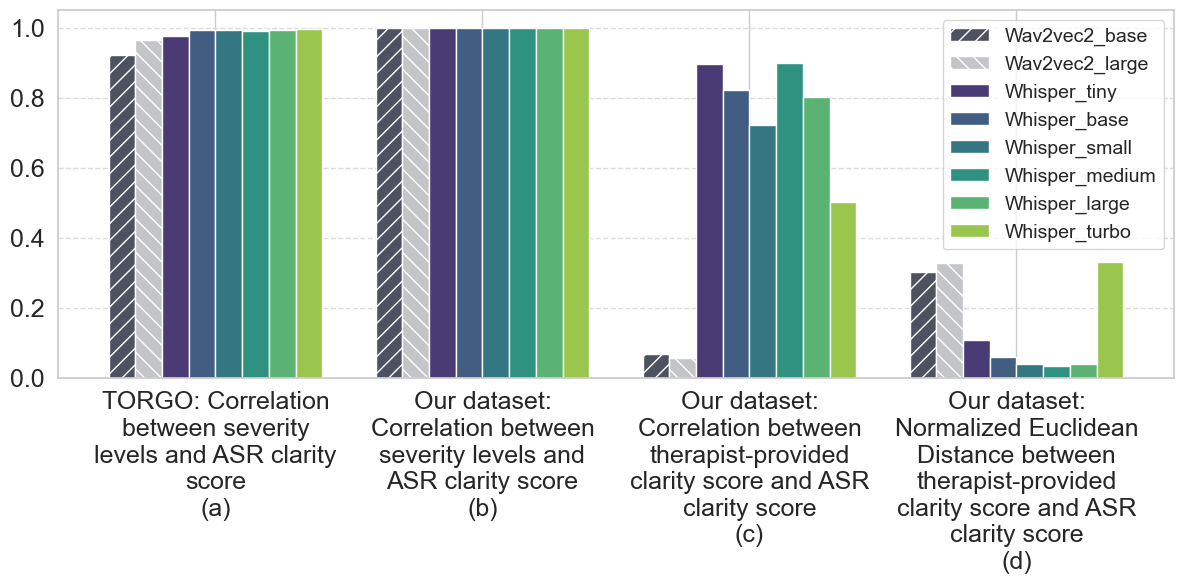

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
# Categories
categories = [
    "TORGO: Correlation between severity levels and ASR clarity score\t\t(a)",
    "Our dataset: Correlation between severity levels and ASR clarity score\n    (b)",
    "Our dataset: Correlation between therapist-provided clarity score and ASR clarity score\t\t(c)",
    "Our dataset: Normalized Euclidean Distance between therapist-provided clarity score and ASR clarity score\t(d)"
]
wrapped_categories = [textwrap.fill(cat, width=22) for cat in categories]

# Models
models = [
    "Wav2vec2_base", "Wav2vec2_large", "Whisper_tiny", "Whisper_base", 
    "Whisper_small", "Whisper_medium", "Whisper_large", "Whisper_turbo"
]

# Data
data = np.array([
    [0.9218, 0.9640, 0.9757, 0.9934, 0.9933, 0.9905, 0.9918, 0.9964],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [0.0703, 0.0575, 0.8973, 0.8210, 0.7232, 0.8997, 0.8017, 0.5029],
    [0.3028, 0.3279, 0.1084, 0.0613, 0.0414, 0.0348, 0.0400, 0.3316]
])

# Bar width and positions
x = np.arange(len(categories))
bar_width = 0.1
# colors = ["#ff9999", "#66b3ff", "#999999", "#ffcc99", "#c2c2f0", "#ffb3e6", "#70dc79", "#ff6666"]
colors = ["#4c525f", "#c3c5c9",'#4b3b75','#415e82', "#347681", "#2f917f", "#5ab273", "#9ac64e"]
# patterns = ['//', '\\\\', '||', '--', '++', 'x', 'o', '.']  # Different patterns
patterns = ['//', '\\\\', '', '', '', '', '', '']  # Different patterns
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars = []
for i, (model, color, pattern) in enumerate(zip(models, colors, patterns)):
    bars.append(
        ax.bar(x + i * bar_width, data[:, i], width=bar_width, label=model, color=color, hatch=pattern)
    )

# Formatting
# ax.set_xlabel("Metrics")
# ax.set_ylabel("Scores",fontsize=18)
# ax.set_title("Comparison of ASR Models on Different Metrics")
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(wrapped_categories, rotation=0, ha='center',fontsize=18)
# ax.set_yticklabels(fontsize=15)
ax.legend(bbox_to_anchor=(1,1),fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()


In [41]:
import numpy as np
import scipy.stats as stats
import itertools
from statsmodels.stats.multitest import multipletests

# Data from the table (excluding 'Therapist' column)
data = np.array([
    [45.65, 50.87, 64.35, 75.65, 83.48, 85.22, 85.65, 84.35],
    [42.17, 38.70, 61.30, 71.30, 79.13, 82.61, 83.91, 46.96],
    [43.04, 38.70, 86.52, 91.74, 90.00, 96.52, 93.04, 96.09],
    [43.48, 24.78, 55.22, 59.57, 66.96, 77.83, 74.78, -21.74],
    [47.39, 46.96, 72.61, 82.17, 96.96, 91.74, 94.78, 55.65],
    [45.65, 56.09, 58.70, 66.09, 78.26, 82.61, 84.78, 32.17]
])

# Friedman test
friedman_stat, p_value = stats.friedmanchisquare(*data.T)

# Post-hoc Wilcoxon signed-rank test with Bonferroni correction
pairs = list(itertools.combinations(range(data.shape[1]), 2))
wilcoxon_results = []
p_values = []

for i, j in pairs:
    stat, p = stats.wilcoxon(data[:, i], data[:, j])
    wilcoxon_results.append(((i, j), stat, p))
    p_values.append(p)

# Apply Bonferroni correction
_, p_values_corrected, _, _ = multipletests(p_values, method='bonferroni')

# Format results
post_hoc_results = [(pairs[i], wilcoxon_results[i][1], p_values[i], p_values_corrected[i]) for i in range(len(pairs))]

friedman_stat, p_value, post_hoc_results


(33.0,
 2.6476442940650662e-05,
 [((0, 1), 9.0, 0.84375, 1.0),
  ((0, 2), 0.0, 0.03125, 0.875),
  ((0, 3), 0.0, 0.03125, 0.875),
  ((0, 4), 0.0, 0.03125, 0.875),
  ((0, 5), 0.0, 0.03125, 0.875),
  ((0, 6), 0.0, 0.03125, 0.875),
  ((0, 7), 9.0, 0.84375, 1.0),
  ((1, 2), 0.0, 0.03125, 0.875),
  ((1, 3), 0.0, 0.03125, 0.875),
  ((1, 4), 0.0, 0.03125, 0.875),
  ((1, 5), 0.0, 0.03125, 0.875),
  ((1, 6), 0.0, 0.03125, 0.875),
  ((1, 7), 8.0, 0.6875, 1.0),
  ((2, 3), 0.0, 0.03125, 0.875),
  ((2, 4), 0.0, 0.03125, 0.875),
  ((2, 5), 0.0, 0.03125, 0.875),
  ((2, 6), 0.0, 0.03125, 0.875),
  ((2, 7), 5.0, 0.3125, 1.0),
  ((3, 4), 1.0, 0.0625, 1.0),
  ((3, 5), 0.0, 0.03125, 0.875),
  ((3, 6), 0.0, 0.03125, 0.875),
  ((3, 7), 3.0, 0.15625, 1.0),
  ((4, 5), 4.0, 0.21875, 1.0),
  ((4, 6), 2.0, 0.09375, 1.0),
  ((4, 7), 3.0, 0.15625, 1.0),
  ((5, 6), 10.0, 1.0, 1.0),
  ((5, 7), 0.0, 0.03125, 0.875),
  ((6, 7), 2.0, 0.09375, 1.0)])

## Temporal Localization (Precision, Recall, F-Score)

/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_78885/3965649351.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=25, fontsize=25)
/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_78885/3965649351.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5],fontsize=20)
/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_78885/3965649351.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_names, rotation=25, fontsize=25)
/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_78885/3965649351.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

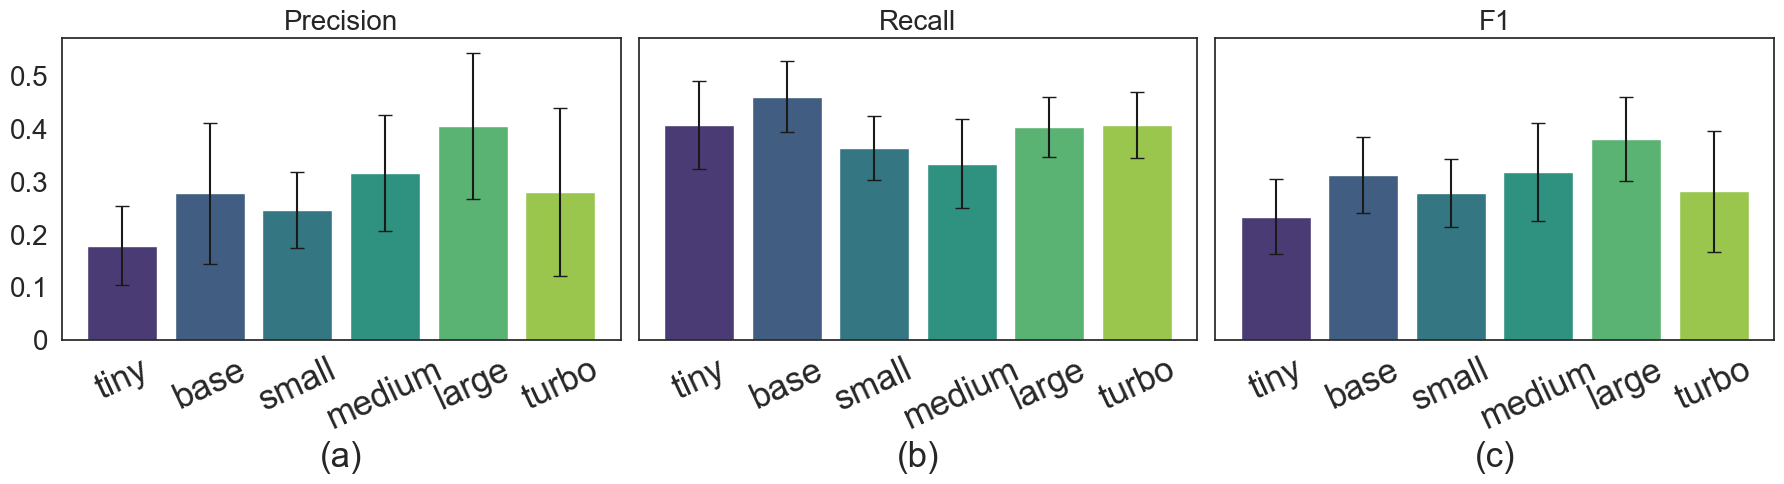

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem

# Load the CSV file
file_path = "temporal/evaluation_summary_grouped_v2.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Compute mean and confidence intervals (95% CI) for each model_size
metrics = ["Precision", "Recall", "F1"]
summary = df.groupby("model_size")[metrics].agg(["mean", sem])
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

# Calculate 95% confidence intervals (CI = 1.96 * standard error of the mean)
for metric in metrics:
    summary[f"{metric}_CI"] = 1.96 * summary[f"{metric}_sem"]

# Define the correct model order
# model_order = ["Whisper-tiny", "Whisper-base", "Whisper-small", "Whisper-medium", "Whisper-large", "Whisper-turbo"]
model_order = ["tiny", "base", "small", "medium", "large", "turbo"]
model_names = ["tiny", "base", "small", "medium", "large", "turbo"]
summary = summary.reindex(model_order)

# Plot settings
sns.set(style="white", palette="pastel")

# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
plt.yticks(fontsize=20)
patterns = ['||', '--', '++', 'x', 'o', '.']  # Patterns for bars
# colors = ["#999999", "#ffcc99", "#c2c2f0", "#ffb3e6", "#70dc79", "#ff6666"]
colors = ['#4b3b75','#415e82', "#347681", "#2f917f", "#5ab273", "#9ac64e"]
fig_id = ["(a)","(b)","(c)"]

for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = ax.bar(
        summary.index, summary[f"{metric}_mean"], 
        yerr=summary[f"{metric}_CI"], capsize=5, color=colors
    )
    
    # # Apply different patterns
    # for bar, pattern in zip(bars, patterns):
    #     bar.set_hatch(pattern)

    ax.set_title(metric, fontsize=20)
    # ax.set_ylabel("Score", fontsize=12)
    # ax.set_xlabel("Model Size", fontsize=12)
    ax.set_xlabel(fig_id[i], fontsize=25)
    # ax.set_xticklabels(summary.index, rotation=20, fontsize=18)
    ax.set_xticklabels(model_names, rotation=25, fontsize=25)
    ax.set_yticklabels([0,0.1,0.2,0.3,0.4,0.5],fontsize=20)
    

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Statistical significance in the above plot

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations

# Load the dataset
file_path = "temporal/evaluation_summary_grouped_v2.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Define metrics and models
metrics = ["Precision", "Recall", "F1"]
# model_order = ["Whisper-tiny", "Whisper-base", "Whisper-small", "Whisper-medium", "Whisper-large", "Whisper-turbo"]
model_order = ["tiny", "base", "small", "medium", "large", "turbo"]

# Function to perform statistical tests
def perform_tests(df, metric):
    print(f"\n--- {metric} ---")
    data = [df[df["model_size"] == model][metric].dropna() for model in model_order]
    
    # Shapiro-Wilk test for normality
    shapiro_pvals = [stats.shapiro(group)[1] for group in data]
    normal = all(p > 0.05 for p in shapiro_pvals)
    
    if normal:
        print("Data is normal, performing ANOVA...")
        anova_p = stats.f_oneway(*data)[1]
        if anova_p < 0.05:
            print("Significant difference found, performing Tukey HSD...")
            tukey = pairwise_tukeyhsd(df[metric], df["model_size"])
            print(tukey)
        else:
            print("No significant difference found.")
    else:
        print("Data is not normal, performing Friedman test...")
        if len(data[0]) == len(data[-1]):  # Ensure equal sample sizes for Friedman
            friedman_p = stats.friedmanchisquare(*data)[1]
            print("friedman = ",stats.friedmanchisquare(*data))
            if friedman_p < 0.05:
                print("Significant difference found, performing Wilcoxon tests...")
                for (m1, m2) in combinations(model_order, 2):
                    d1 = df[df["model_size"] == m1][metric].dropna()
                    d2 = df[df["model_size"] == m2][metric].dropna()
                    if len(d1) == len(d2):  # Wilcoxon requires equal lengths
                        p = stats.wilcoxon(d1, d2)[1]
                        print("wilcoxon = ",stats.wilcoxon(d1, d2))
                        if p < 0.05:
                            print(f"{m1} vs {m2}: p = {p:.5f} (significant)")
            else:
                print("No significant difference found.")
        else:
            print("Friedman test skipped due to unequal sample sizes.")

# Run tests for each metric
for metric in metrics:
    perform_tests(df, metric)


/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_17022/1932828682.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd



--- Precision ---
Data is not normal, performing Friedman test...
friedman =  FriedmanchisquareResult(statistic=14.682151589242043, pvalue=0.011810398425142048)
Significant difference found, performing Wilcoxon tests...
wilcoxon =  WilcoxonResult(statistic=4.0, pvalue=0.00341796875)
tiny vs base: p = 0.00342 (significant)
wilcoxon =  WilcoxonResult(statistic=14.0, pvalue=0.05224609375)
wilcoxon =  WilcoxonResult(statistic=12.0, pvalue=0.0341796875)
tiny vs medium: p = 0.03418 (significant)
wilcoxon =  WilcoxonResult(statistic=5.0, pvalue=0.0048828125)
tiny vs large: p = 0.00488 (significant)
wilcoxon =  WilcoxonResult(statistic=22.0, pvalue=0.20361328125)
wilcoxon =  WilcoxonResult(statistic=25.0, pvalue=0.30126953125)
wilcoxon =  WilcoxonResult(statistic=15.0, pvalue=0.06396484375)
wilcoxon =  WilcoxonResult(statistic=10.0, pvalue=0.04085984371280629)
base vs large: p = 0.04086 (significant)
wilcoxon =  WilcoxonResult(statistic=32.0, pvalue=0.9291527647091152)
wilcoxon =  WilcoxonRes

/Users/chitralekhagupta/opt/anaconda3/envs/openai/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


## Recall per mispronunciation class

/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_78885/2714390855.py:28: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'darkgrey'}` instead.

  ax = sns.barplot(x="Error Type", y="recall", hue="Model", data=df, hue_order=model_order, palette="viridis", capsize=0.05, errcolor="darkgrey", errorbar='ci', errwidth=0.8)
/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_78885/2714390855.py:28: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.8}` instead.

  ax = sns.barplot(x="Error Type", y="recall", hue="Model", data=df, hue_order=model_order, palette="viridis", capsize=0.05, errcolor="darkgrey", errorbar='ci', errwidth=0.8)


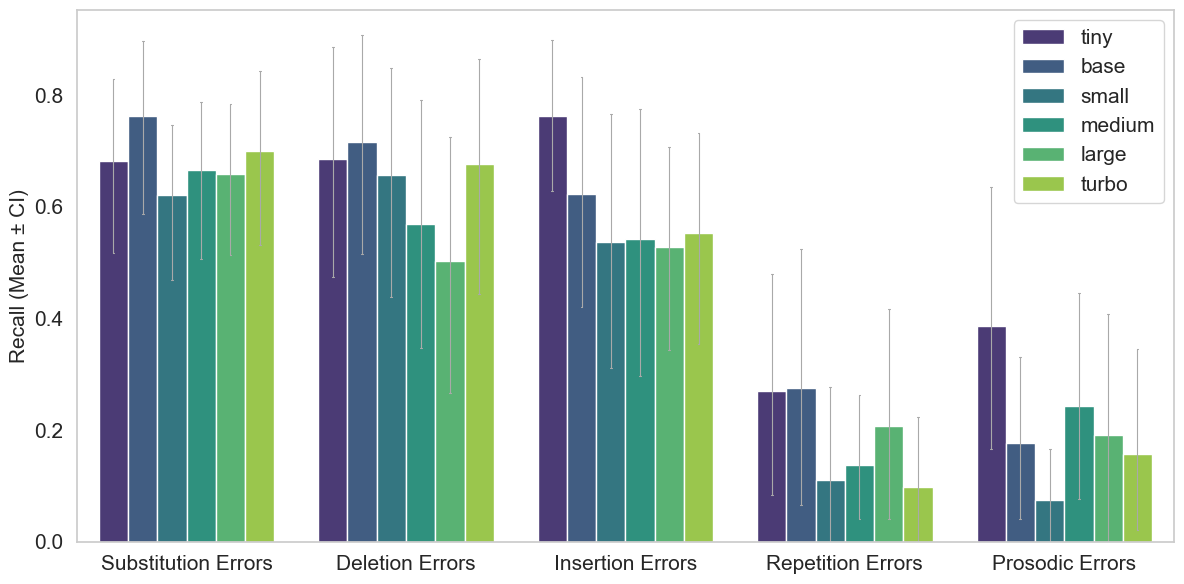

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "temporal/final_counts_byGroup_v2.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Define the order of models
model_order = ["tiny", "base", "small", "medium", "large", "turbo"]

# Define the order of models
error_order = ["Substitution Errors", "Deletion Errors", "Insertion Errors", "Repetition Errors", "Prosodic Errors"]

# Convert 'Error Type' to categorical with specified order
df["Error Type"] = pd.Categorical(df["Error Type"], categories=error_order, ordered=True)


# Set plot style
# sns.set(style="whitegrid")
patterns = ['||', '--', '++', 'x', 'o', '.']  # Patterns for bars
colors = ["#999999", "#ffcc99", "#c2c2f0", "#ffb3e6", "#70dc79", "#ff6666"]
plt.style.context("seaborn-white")
# Create Recall plots
plt.figure(figsize=(12, 6))
plt.style.context("seaborn-white")
# ax = sns.barplot(x="Error Type", y="recall", hue="Model", data=df, hue_order=model_order, palette=colors, capsize=0.05, errcolor="darkgrey", errorbar='ci', errwidth=0.8)
ax = sns.barplot(x="Error Type", y="recall", hue="Model", data=df, hue_order=model_order, palette="viridis", capsize=0.05, errcolor="darkgrey", errorbar='ci', errwidth=0.8)


# Formatting
plt.xlabel("", fontsize=12)
plt.ylabel("Recall (Mean ± CI)", fontsize=15)
# plt.title("Recall Across Different Models for Each Error Type", fontsize=14)
plt.xticks(rotation=0, fontsize=15)  # Keep x-axis labels horizontal
plt.legend(fontsize=15) 
plt.yticks(fontsize=15)
plt.tight_layout()
ax.grid(False)

# Show plot
plt.show()

### Statistical significance in the above plot - between models

In [67]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
file_path = "temporal/final_counts_byGroup_v2.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Define model order
model_order = ["tiny", "base", "small", "medium", "large", "turbo"]

# Initialize results dictionary
results = {}

# Perform statistical tests for each error type
for error_type, group in df.groupby("Error Type"):
    print(f"\nStatistical Analysis for Error Type: {error_type}")
    
    # Extract recall values for each model
    recall_data = [group[group["Model"] == model]["recall"].dropna().values for model in model_order]
    
    # Check normality using Shapiro-Wilk test
    shapiro_pvals = [stats.shapiro(data)[1] if len(data) > 3 else 1.0 for data in recall_data]  # Avoid error for small samples
    normal = all(p > 0.05 for p in shapiro_pvals)
    
    if normal:
        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*recall_data)
        print(f"ANOVA p-value: {p_value}")
        
        if p_value < 0.05:
            # Post-hoc Tukey HSD
            posthoc = pairwise_tukeyhsd(df["recall"], df["Model"])
            print(posthoc)
    else:
        # Perform Friedman test
        try:
            friedman_stat, friedman_p = stats.friedmanchisquare(*recall_data)
            print(f"Friedman Test p-value: {friedman_p}")
            
            if friedman_p < 0.05:
                # Post-hoc Wilcoxon signed-rank test
                posthoc = sp.posthoc_wilcoxon(df, val_col="recall", group_col="Model", p_adjust="bonferroni")
                print(posthoc)
        except ValueError:
            print("Not enough data for Friedman test.")



Statistical Analysis for Error Type: Deletion Errors
Friedman Test p-value: 0.09309219500476813

Statistical Analysis for Error Type: Insertion Errors
Friedman Test p-value: 0.050236586145348754

Statistical Analysis for Error Type: Prosodic Errors
Friedman Test p-value: 0.059797003783774214

Statistical Analysis for Error Type: Repetition Errors
Friedman Test p-value: 0.3959892364308582

Statistical Analysis for Error Type: Substitution Errors
Friedman Test p-value: 0.021386324507986044
            tiny      base     small    medium     large     turbo
tiny    1.000000  1.000000  0.017936  0.026859  0.041073  0.051882
base    1.000000  1.000000  0.101021  1.000000  0.208633  0.731871
small   0.017936  0.101021  1.000000  1.000000  1.000000  1.000000
medium  0.026859  1.000000  1.000000  1.000000  1.000000  1.000000
large   0.041073  0.208633  1.000000  1.000000  1.000000  1.000000
turbo   0.051882  0.731871  1.000000  1.000000  1.000000  1.000000


### Statistical significance in the above plot - between error classes

In [68]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
file_path = "temporal/final_counts_byGroup_v2.csv"  # Update with correct path
df = pd.read_csv(file_path)

# Define error types
error_types = df["Error Type"].unique()

# Initialize results dictionary
results = {}

# Perform statistical tests for each model
for model, group in df.groupby("Model"):
    print(f"\nStatistical Analysis for Model: {model}")
    
    # Extract recall values for each error type
    recall_data = [group[group["Error Type"] == error_type]["recall"].dropna().values for error_type in error_types]
    
    # Check normality using Shapiro-Wilk test
    shapiro_pvals = [stats.shapiro(data)[1] if len(data) > 3 else 1.0 for data in recall_data]  # Avoid error for small samples
    normal = all(p > 0.05 for p in shapiro_pvals)
    
    if normal:
        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*recall_data)
        print(f"ANOVA p-value: {p_value}")
        
        if p_value < 0.05:
            # Post-hoc Tukey HSD
            posthoc = pairwise_tukeyhsd(df["recall"], df["Error Type"])
            print(posthoc)
    else:
        # Perform Friedman test
        # try:
        friedman_stat, friedman_p = stats.friedmanchisquare(*recall_data)
        print(f"Friedman Test p-value: {friedman_p}")
        
        if friedman_p < 0.05:
            # Post-hoc Wilcoxon signed-rank test
            posthoc = sp.posthoc_wilcoxon(df, val_col="recall", group_col="Error Type", p_adjust="bonferroni")
            print(posthoc)
        # except ValueError:
        #     print("Not enough data for Friedman test.")


Statistical Analysis for Model: base
Friedman Test p-value: 0.0016741941724676835
                     Substitution Errors  Deletion Errors  Insertion Errors  \
Substitution Errors         1.000000e+00     1.000000e+00      9.196652e-01   
Deletion Errors             1.000000e+00     1.000000e+00      1.000000e+00   
Insertion Errors            9.196652e-01     1.000000e+00      1.000000e+00   
Repetition Errors           3.818496e-10     9.789273e-08      5.013133e-07   
Prosodic Errors             3.318361e-10     2.504000e-06      4.380169e-07   

                     Repetition Errors  Prosodic Errors  
Substitution Errors       3.818496e-10     3.318361e-10  
Deletion Errors           9.789273e-08     2.504000e-06  
Insertion Errors          5.013133e-07     4.380169e-07  
Repetition Errors         1.000000e+00     1.000000e+00  
Prosodic Errors           1.000000e+00     1.000000e+00  

Statistical Analysis for Model: large
Friedman Test p-value: 0.005506407304740934
           